https://hyongdoc.tistory.com/429

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy
from scipy.special import entr


!pip install PyWavelets
#statsmodel은 upgrade 버젼만 AutoReg 사용가능
!pip install statsmodels
!pip install statsmodels --upgrade

from statsmodels.tsa.ar_model import AutoReg, ar_select_order

import pywt
import pywt.data

     |████████████████████████████████| 9.5 MB 8.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset_path_1st = '/content/drive/MyDrive/2021 여름방학/베어링 손상 예측/1st_test'
dataset_path_2nd = '/content/drive/MyDrive/2021 여름방학/베어링 손상 예측/2nd_test' 
dataset_path_3rd = '/content/drive/MyDrive/2021 여름방학/베어링 손상 예측/3rd_test' 

In [4]:
# Test for the first file
dataset = pd.read_csv( dataset_path_3rd+'/2004.03.04.09.27.46', sep='\t')
dataset.columns = ['Bearing 1','Bearing 2','Bearing 3','Bearing 4']
dataset.head()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
0,0.103,0.083,-0.061,-0.012
1,0.095,-0.039,-0.007,0.039
2,0.000,0.110,0.022,-0.002
3,0.005,0.154,-0.127,-0.020
4,0.010,0.027,-0.007,-0.039


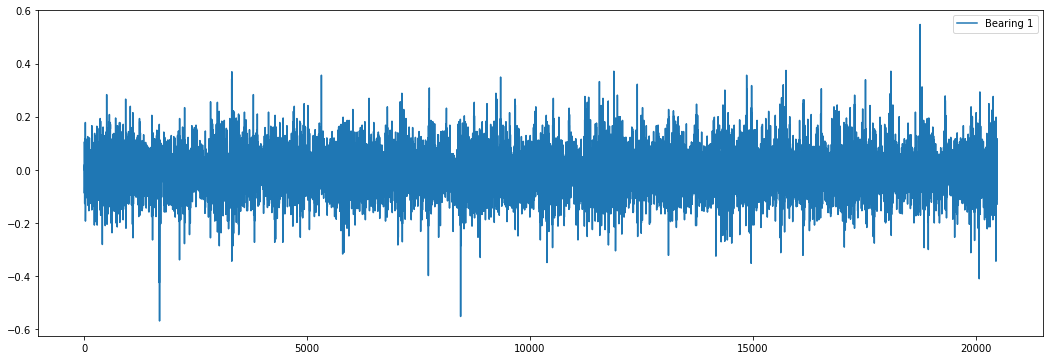

In [5]:
# raw signal
dataset[['Bearing 1']].plot(figsize=(18,6));

In [ ]:
# old extract function
def merge_data(dataset_path, id_set=None):
    data = pd.DataFrame()
    for filename in os.listdir(dataset_path):
        dataset=pd.read_csv(os.path.join(dataset_path, filename), sep='\t')
        dataset_mean_abs = np.array(dataset.abs().mean())
        if id_set == 1:
            dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1,8))
        else:
            dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1,4))
        dataset_mean_abs.index = [filename]
        data = data.append(dataset_mean_abs)
    
    if id_set == 1:
        data.columns = ['B1_a','B1_b','B2_a','B2_b','B3_a','B3_b','B4_a','B4_b'] #dataset1은 channel 8개
    else:
        data.columns = ['B1','B2','B3','B4']
        
    data.index = pd.to_datetime(data.index, format='%Y.%m.%d.%H.%M.%S') #년,월,일, 시,분,초
    data = data.sort_index()
    return data
  
data_3rd = merge_data(dataset_path_3rd)

# **Preprocessing**
Signal Decomposition https://github.com/PyWavelets/pywt/blob/master/demo/dwt_signal_decomposition.py

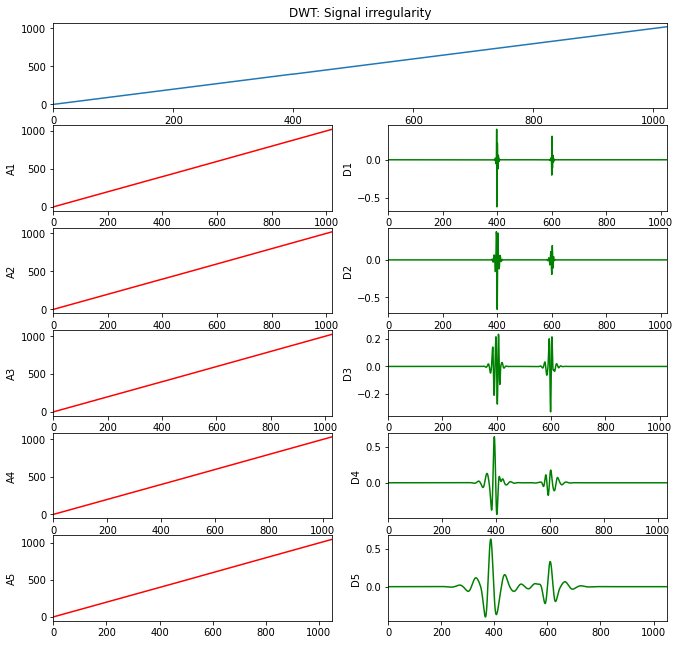

In [7]:
ecg = pywt.data.ecg()

data1 = np.concatenate((np.arange(1, 400),
                        np.arange(398, 600),
                        np.arange(601, 1024)))
x = np.linspace(0.082, 2.128, num=1024)[::-1]
data2 = np.sin(40 * np.log(x)) * np.sign((np.log(x)))

mode = pywt.Modes.smooth


def plot_signal_decomp(data, w, title):
    """Decompose and plot a signal S.
    S = An + Dn + Dn-1 + ... + D1
    """
    w = pywt.Wavelet(w)
    a = data
    ca = []
    cd = []
    for i in range(5):
        (a, d) = pywt.dwt(a, w, mode)
        ca.append(a)
        cd.append(d)

    rec_a = []
    rec_d = []

    for i, coeff in enumerate(ca):
        coeff_list = [coeff, None] + [None] * i
        rec_a.append(pywt.waverec(coeff_list, w))

    for i, coeff in enumerate(cd):
        coeff_list = [None, coeff] + [None] * i
        rec_d.append(pywt.waverec(coeff_list, w))

    fig = plt.figure(figsize=(11,11))
    ax_main = fig.add_subplot(len(rec_a) + 1, 1, 1)
    ax_main.set_title(title)
    ax_main.plot(data)
    ax_main.set_xlim(0, len(data) - 1)
    #print(len(rec_a))

    for i, y in enumerate(rec_a):
        ax = fig.add_subplot(len(rec_a) + 1, 2, 3 + i * 2)
        ax.plot(y, 'r')
        ax.set_xlim(0, len(y) - 1)
        ax.set_ylabel("A%d" % (i + 1))

    for i, y in enumerate(rec_d):
        ax = fig.add_subplot(len(rec_d) + 1, 2, 4 + i * 2)
        ax.plot(y, 'g')
        ax.set_xlim(0, len(y) - 1)
        ax.set_ylabel("D%d" % (i + 1))


plot_signal_decomp(data1, 'coif5', "DWT: Signal irregularity")
plt.show()

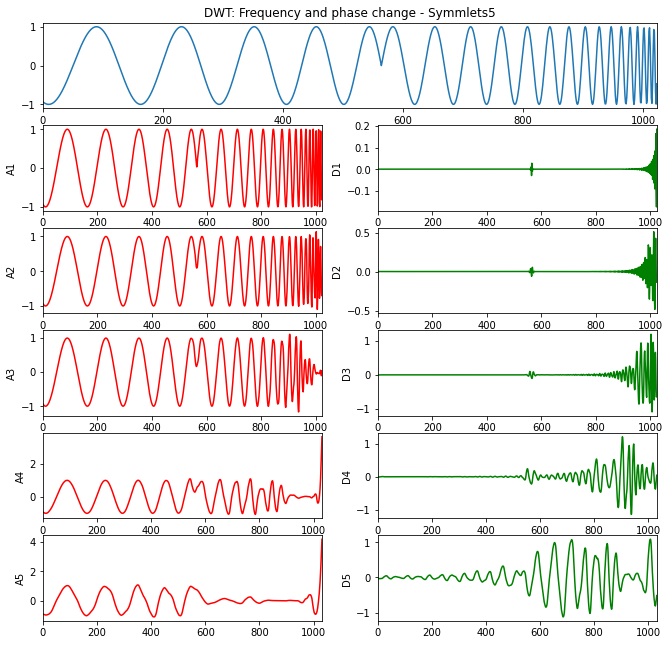

In [8]:
plot_signal_decomp(data2, 'sym5',
                   "DWT: Frequency and phase change - Symmlets5")
plt.show()

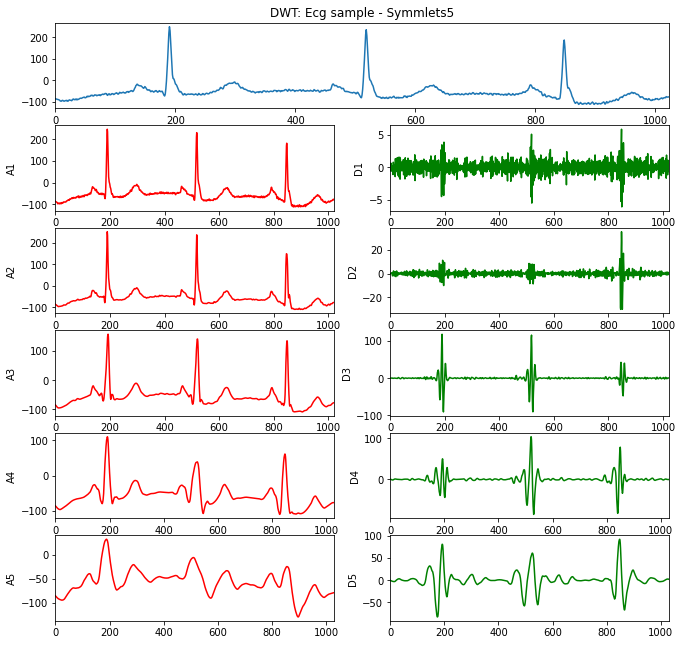

In [9]:
plot_signal_decomp(ecg, 'sym5', "DWT: Ecg sample - Symmlets5")
plt.show()

In [10]:
#change the upper code cell
plot_signal_decomp(data_3rd['B1'], 'sym5', "DWT : test_3rd_B1")
plt.show()


NameError: ignored